In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df_pos = df[df['sentiment'] == 'positive'][:8000]
df_neg = df[df['sentiment'] == 'negative'][:2000]

In [10]:
df_imb = pd.concat([df_pos, df_neg])

In [11]:
df_imb.value_counts('sentiment')

sentiment
positive    8000
negative    2000
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

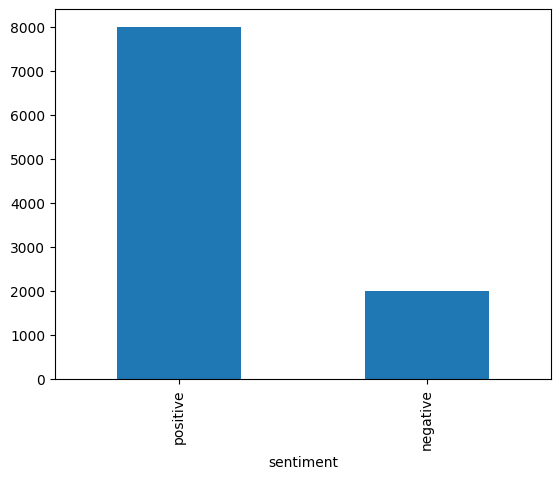

In [12]:
df_imb.value_counts('sentiment').plot(
    kind = 'bar'
)

In [15]:
neg_len = len(df_imb[df_imb['sentiment'] == 'negative'])

In [17]:
df_pos = df_imb[df_imb['sentiment'] == 'positive'].sample(n=neg_len)

In [18]:
df_neg = df_imb[df_imb['sentiment'] == 'negative']

In [21]:
df_bal = pd.concat([df_pos, df_neg])

In [23]:
df_bal.reset_index(drop = True, inplace = True)

In [24]:
df_bal.head()

,review,sentiment
0,My 10/10 rating is merely for the fun factor a...,positive
1,"There's a spartan, unsentimental edge to this ...",positive
2,"First of all, I liked very much the central id...",positive
3,Wow this Wrestlemania took place from 3 differ...,positive
4,Stack should have received the Academy Award f...,positive


In [25]:
from imblearn.under_sampling import RandomUnderSampler

In [27]:
rus = RandomUnderSampler(random_state = 0)

In [29]:
df_bal, df_bal['sentiment'] = rus.fit_resample(df_imb[['review']], df_imb['sentiment'] )

In [31]:
df_bal.value_counts('sentiment')

sentiment
negative    2000
positive    2000
Name: count, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split


In [34]:
train, test = train_test_split(df_bal, test_size = 0.33, random_state = 42)

In [35]:
train

,review,sentiment
715,This has to be one of the 5 worst movies ever ...,negative
6613,Surface was one of the few truly unique shows ...,positive
14521,Surprisingly effective British drama about two...,positive
5422,I've just finished listening to the director's...,positive
7313,The film of Artemisia may be considered treaso...,positive
...,...,...
2298,I hope the people who made this movies read th...,negative
2608,I like Steve Buscemi. I like his work very muc...,negative
1739,"Obviously, the comments above that fawn over t...",negative
9228,"""Citizen X"" is the superbly told true story of...",positive


In [36]:
train.shape

(2680, 2)

In [37]:
test

,review,sentiment
1112,I just watched this movie on Bravo! and it was...,negative
7047,George Armstrong Custer is known through histo...,positive
1062,Probably New Zealands worst Movie ever made<br...,negative
12456,The 1990s film with Anthony Hopkins and Debra ...,positive
14563,Strange yet emotionally disturbing chiller abo...,positive
...,...,...
627,Why is it that Canada can turn out decent to g...,negative
3316,"This was a truly bad film. The character ""Cole...",negative
11022,Many animation buffs consider Wladyslaw Starew...,positive
11176,This great film is composed mostly of document...,positive


In [38]:
test.shape

(1320, 2)

In [39]:
train_X, train_Y = train['review'], train['sentiment']
test_X, test_Y = test['review'], test['sentiment']

In [41]:
train_Y.value_counts()

sentiment
positive    1368
negative    1312
Name: count, dtype: int64

In [42]:
test_Y.value_counts()

sentiment
negative    688
positive    632
Name: count, dtype: int64

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
tfidf = TfidfVectorizer(stop_words='english')

In [50]:
train_X_vec = tfidf.fit_transform(train_X)
test_X_vec = tfidf.transform(test_X)

In [51]:
pd.DataFrame.sparse.from_spmatrix(train_X_vec,
                                  index = train_X.index,
                                  columns = tfidf.get_feature_names_out())

,00,000,007,00o,00s,01,0126,02,04,06,...,zula,zulu,zwick,zzzzzzzzzzzzzzzzzz,æon,élan,émigrés,ísnt,önsjön,überwoman
715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn.svm import SVC

In [54]:
svc = SVC(kernel = 'linear')

In [55]:
svc.fit(train_X_vec, train_Y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [63]:
svc.predict(tfidf.transform(['didnt like the movie']))

array(['negative'], dtype=object)

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dec_tree = DecisionTreeClassifier()

In [67]:
dec_tree.fit(train_X_vec, train_Y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
gnb = GaussianNB()

In [81]:
gnb.fit(train_X_vec.toarray(), train_Y)

,priors,None
,var_smoothing,1e-09


In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
log_reg = LogisticRegression()

In [74]:
log_reg.fit(train_X_vec, train_Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(test_Y,
                 svc.predict(test_X_vec),
                 labels = ['positive', 'negative'])

array([[541,  91],
       [124, 564]])

In [77]:
 confusion_matrix(test_Y,
                 dec_tree.predict(test_X_vec),
                 labels = ['positive', 'negative'])

array([[419, 213],
       [227, 461]])

In [84]:
confusion_matrix(test_Y,
                 gnb.predict(test_X_vec.toarray()),
                 labels = ['positive', 'negative'])

array([[416, 216],
       [272, 416]])

In [82]:
confusion_matrix(test_Y,
                 log_reg.predict(test_X_vec),
                 labels = ['positive', 'negative'])

array([[552,  80],
       [137, 551]])

In [89]:
print(svc.score(test_X_vec, test_Y))
print(dec_tree.score(test_X_vec, test_Y))
print(gnb.score(test_X_vec.toarray(), test_Y))
print(log_reg.score(test_X_vec, test_Y))

0.8371212121212122
0.6666666666666666
0.6303030303030303
0.8356060606060606


In [90]:
from sklearn.metrics import f1_score

In [91]:
f1_score(
    test_Y,
    svc.predict(test_X_vec),
    labels = ['positive', 'negative'],
    average = None
)

array([0.83423285, 0.83991065])

In [92]:
f1_score(
    test_Y,
    dec_tree.predict(test_X_vec),
    labels = ['positive', 'negative'],
    average = None
)

array([0.65571205, 0.67694567])

In [93]:
f1_score(
    test_Y,
    gnb.predict(test_X_vec.toarray()),
    labels = ['positive', 'negative'],
    average = None
)

array([0.63030303, 0.63030303])

In [94]:
f1_score(
    test_Y,
    log_reg.predict(test_X_vec),
    labels = ['positive', 'negative'],
    average = None
)

array([0.83573051, 0.83548143])

In [95]:
from sklearn.metrics import classification_report

In [97]:
print(classification_report(
    test_Y, 
    svc.predict(test_X_vec),
    labels = ['positive', 'negative']
))

              precision    recall  f1-score   support

    positive       0.81      0.86      0.83       632
    negative       0.86      0.82      0.84       688

    accuracy                           0.84      1320
   macro avg       0.84      0.84      0.84      1320
weighted avg       0.84      0.84      0.84      1320



In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
parameters = {'C': [1, 4, 8, 16, 32],
              'kernel':['linear', 'rbf']}

In [100]:
svc = SVC()

In [101]:
svc_grid = GridSearchCV(svc, parameters, cv = 5)

In [102]:
svc_grid.fit(train_X_vec, train_Y)

,estimator,SVC()
,param_grid,"{'C': [1, 4, ...], 'kernel': ['linear', 'rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [103]:
print(classification_report(
    test_Y, 
    svc_grid.predict(test_X_vec),
    labels = ['positive', 'negative']
))

              precision    recall  f1-score   support

    positive       0.81      0.86      0.83       632
    negative       0.86      0.82      0.84       688

    accuracy                           0.84      1320
   macro avg       0.84      0.84      0.84      1320
weighted avg       0.84      0.84      0.84      1320

